# 程式碼

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer
import hyperopt
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from hyperopt import STATUS_OK
from hyperopt import hp, fmin, tpe, Trials, partial
from hyperopt.early_stop import no_progress_loss
from sklearn.metrics import auc, confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.ticker as ticker
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from xgboost import XGBClassifier
for dirname, _, filenames in os.walk(r'C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from scipy import stats
from scipy.stats import norm, skew 
import seaborn as sns 

C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\english.xls
C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\E_lvr_land_A.csv
C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\fb240514152702.pdf
C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\KS_Acc.ipynb
C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\KS_Visualization.ipynb
C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\KS_無調整.ipynb
C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\KS_無高斯.ipynb
C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\catboost_info\catboost_training.json
C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\catboost_info\learn_error.tsv
C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\catboost_info\test_error.tsv
C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\catboost_info\time_left.tsv
C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\catboost_info\learn\events.out.tfevents
C:\Users\USER\Desktop\LAO\資料分析\homeKS\paper\catboost_info\test\events.out.tfevents


In [3]:
# 設定 matplotlib 的字體
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 'Microsoft YaHei' 作為例子，可更換成其他字體
plt.rcParams['axes.unicode_minus'] = False  # 正確顯示負號


In [4]:
import warnings
warnings.filterwarnings("ignore")

# 資料前處理

In [5]:
df = pd.read_csv('E_lvr_land_A.csv')
df.head()

,District,sign,address,LandShiftingTotalArea,theUseZoningorCompiles,non-metropolis,non-metropolis2,TransactionYearMonthDay,TransactionPenNumber,ShiftingfloorNumber,...,BerthCategory,BerthShiftingTotalArea,BerthTotalPriceNTD,the note,serial number,main building area,auxiliary building area,balcony area,elevator,ID
0,鹽埕區,房地(土地+建物),高雄市鹽埕區府北路３６號１０樓之１,2.98,商,NaN,NaN,1121218,土地1建物1車位0,十層,...,NaN,0.0,0,NaN,RPRPMLSKIIIGFAE97DA,23.32,0.0,0.00,有,1.0
1,大寮區,土地,永芳段308地號,191.00,都市：其他:道路用地,NaN,NaN,1121103,土地3建物0車位0,NaN,...,NaN,0.0,0,包含公共設施保留地用地；,RPROMLRJJIIGFLE88DA,0.00,0.0,0.00,無,NaN
2,甲仙區,房地(土地+建物),高雄市甲仙區中正路１２７之４號,83.83,住,NaN,NaN,1121101,土地2建物1車位0,全,...,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易；,RPQNMLTJJIIGFHE48DA,291.61,0.0,3.00,無,2.0
3,大寮區,房地(土地+建物),高雄市大寮區立德路７２０號,77.00,住,NaN,NaN,1121101,土地1建物1車位0,全,...,NaN,0.0,0,NaN,RPRNMLMJJIIGFLE28DA,269.70,0.0,22.59,有,NaN
4,大寮區,土地,中庄北段872地號,23.68,都市：其他:道路用地,NaN,NaN,1121101,土地1建物0車位0,NaN,...,NaN,0.0,0,包含公共設施保留地用地；,RPSNMLMJJIIGFLE38DA,0.00,0.0,0.00,無,3.0


In [6]:
df.columns

Index(['District', 'sign', 'address', 'LandShiftingTotalArea',
       'theUseZoningorCompiles', 'non-metropolis', 'non-metropolis2',
       'TransactionYearMonthDay', 'TransactionPenNumber',
       'ShiftingfloorNumber', 'floor', 'BuildingState', 'main use',
       'main building materials', 'ConstructionYear',
       'BuildingShiftingTotalArea', 'Room', 'Hall', 'Bathroom', 'Compartment',
       'ManagementOrganization', 'PriceNTD', 'the unit price NTD',
       'BerthCategory', 'BerthShiftingTotalArea', 'BerthTotalPriceNTD',
       'the note', 'serial number', 'main building area',
       'auxiliary building area', 'balcony area', 'elevator', 'ID'],
      dtype='object')

In [7]:
df.isna().any()

District                     False
sign                         False
address                      False
LandShiftingTotalArea        False
theUseZoningorCompiles        True
non-metropolis                True
non-metropolis2               True
TransactionYearMonthDay      False
TransactionPenNumber         False
ShiftingfloorNumber           True
floor                         True
BuildingState                False
main use                      True
main building materials       True
ConstructionYear              True
BuildingShiftingTotalArea    False
Room                         False
Hall                         False
Bathroom                     False
Compartment                  False
ManagementOrganization       False
PriceNTD                     False
the unit price NTD            True
BerthCategory                 True
BerthShiftingTotalArea       False
BerthTotalPriceNTD           False
the note                      True
serial number                False
main building area  

# 刪除多餘資料

In [8]:
df = df.drop(['sign','address','non-metropolis','non-metropolis2','main use','the unit price NTD','the note','serial number','ID','main building materials'], axis=1)

In [9]:
df.columns

Index(['District', 'LandShiftingTotalArea', 'theUseZoningorCompiles',
       'TransactionYearMonthDay', 'TransactionPenNumber',
       'ShiftingfloorNumber', 'floor', 'BuildingState', 'ConstructionYear',
       'BuildingShiftingTotalArea', 'Room', 'Hall', 'Bathroom', 'Compartment',
       'ManagementOrganization', 'PriceNTD', 'BerthCategory',
       'BerthShiftingTotalArea', 'BerthTotalPriceNTD', 'main building area',
       'auxiliary building area', 'balcony area', 'elevator'],
      dtype='object')

In [10]:
len(df)

10743

In [11]:
train_data = df.dropna(subset =  ['theUseZoningorCompiles'])
train_data = train_data.dropna(subset =  ['ShiftingfloorNumber'])
train_data = train_data.dropna(subset =  ['floor'])
train_data = train_data.dropna(subset =  ['ConstructionYear'])
# train_data = train_data.dropna(subset =  ['main building materials'])

In [12]:
train_data['BerthCategory']= train_data['BerthCategory'].fillna("無")

In [13]:
len(train_data)

8241

In [14]:
train_data.isna().any()

District                     False
LandShiftingTotalArea        False
theUseZoningorCompiles       False
TransactionYearMonthDay      False
TransactionPenNumber         False
ShiftingfloorNumber          False
floor                        False
BuildingState                False
ConstructionYear             False
BuildingShiftingTotalArea    False
Room                         False
Hall                         False
Bathroom                     False
Compartment                  False
ManagementOrganization       False
PriceNTD                     False
BerthCategory                False
BerthShiftingTotalArea       False
BerthTotalPriceNTD           False
main building area           False
auxiliary building area      False
balcony area                 False
elevator                     False
dtype: bool

In [15]:
train_data['BerthCategory'].value_counts()


無       4124
坡道平面    2980
坡道機械     837
一樓平面     205
升降機械      57
升降平面      16
塔式車位      14
其他         8
Name: BerthCategory, dtype: int64

# 圖象化表示

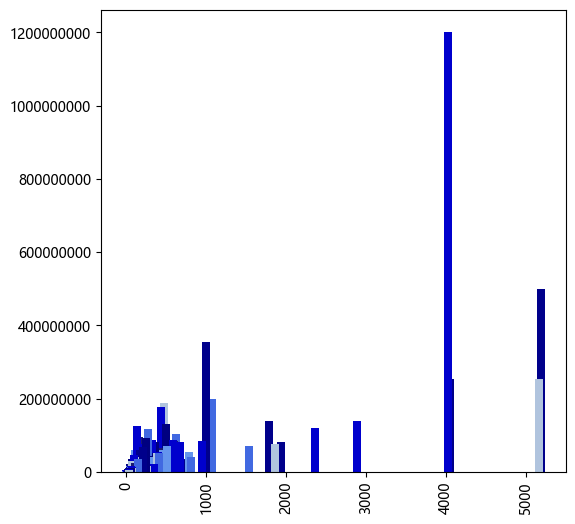

In [16]:
plt.figure(figsize=(6, 6))
plt.bar(train_data['main building area'],
        train_data['PriceNTD'], 
        width=100, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

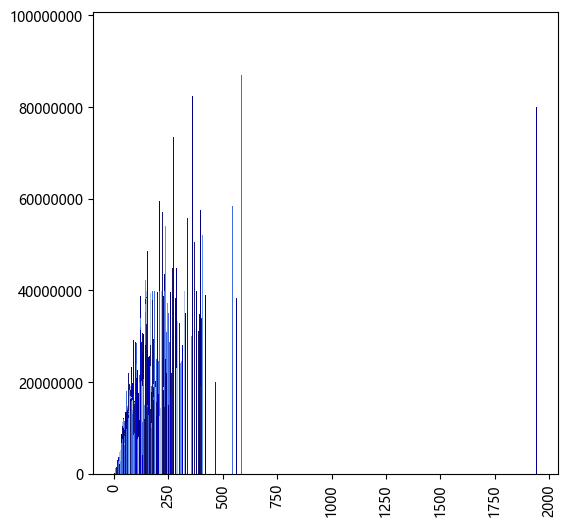

In [17]:
filtered_df = train_data[train_data['PriceNTD'] < 1e8]
plt.figure(figsize=(6, 6))
plt.bar(filtered_df['main building area'],
        filtered_df['PriceNTD'], 
        width=1, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

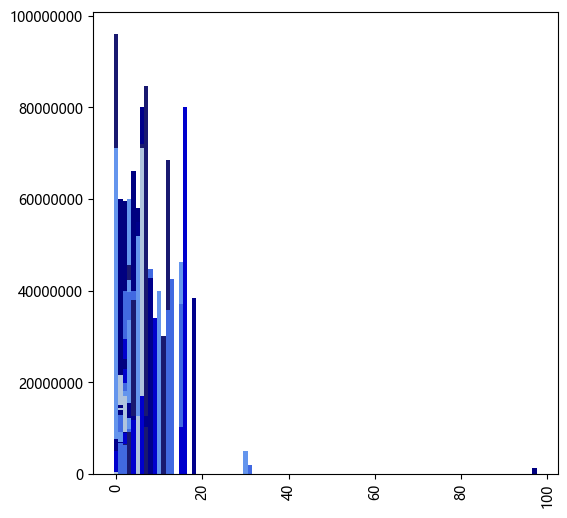

In [18]:
filtered_df = train_data[train_data['PriceNTD'] < 1e8]
plt.figure(figsize=(6, 6))
plt.bar(filtered_df['Room'],
        filtered_df['PriceNTD'], 
        width=1, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

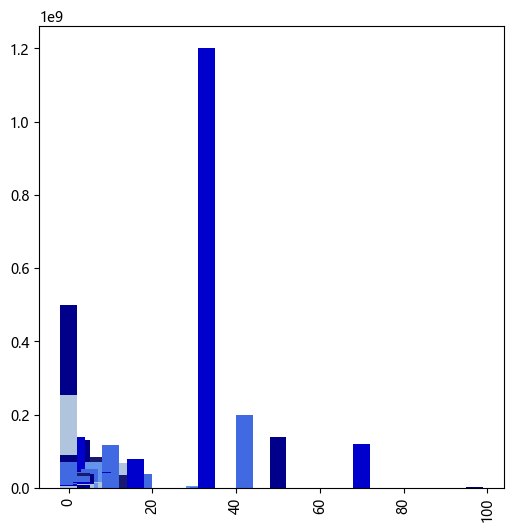

In [19]:
plt.figure(figsize=(6, 6))
plt.bar(train_data['Room'],
        train_data['PriceNTD'], 
        width=4, 
        bottom=None, 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue', 
               'royalblue', 
               'midnightblue', 
               'navy', 
               'darkblue', 
               'mediumblue'])
plt.xticks(rotation='vertical')
plt.show()

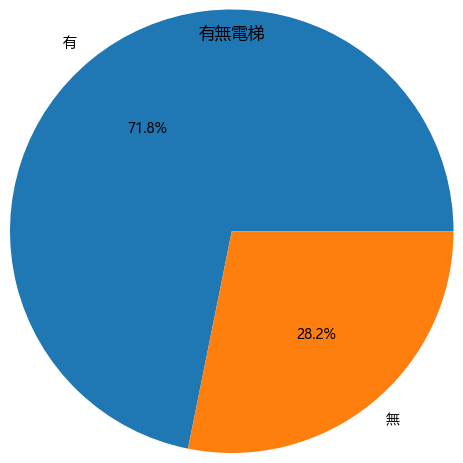

In [20]:
plt.pie(train_data['elevator'].value_counts(), radius=1.5, labels=train_data['elevator'].unique(),autopct='%.1f%%')
plt.title("有無電梯")
plt.show()

In [21]:
df['District'].value_counts()

三民區     1384
楠梓區     1227
鳳山區      998
苓雅區      755
左營區      736
鼓山區      726
大寮區      577
仁武區      532
前鎮區      461
小港區      406
橋頭區      378
岡山區      317
林園區      242
美濃區      205
大社區      190
鳥松區      186
路竹區      174
新興區      159
前金區      143
燕巢區      140
湖內區      108
旗山區      106
大樹區      105
鹽埕區       91
梓官區       85
阿蓮區       67
茄萣區       55
內門區       32
杉林區       30
彌陀區       30
永安區       22
旗津區       18
田寮區       17
甲仙區       16
六龜區       15
桃源區        5
那瑪夏區       5
Name: District, dtype: int64

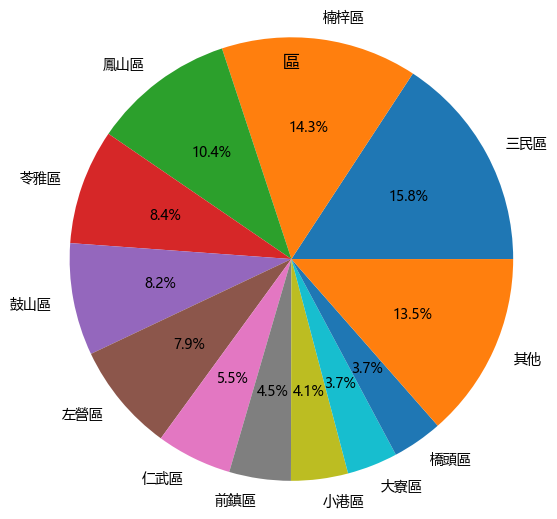

In [22]:
value_counts = train_data['District'].value_counts()

threshold = 0.03 * len(train_data)
other_count = sum(value_counts[value_counts < threshold])

value_counts_filtered = value_counts[value_counts >= threshold]
value_counts_filtered['其他'] = other_count

plt.pie(value_counts_filtered, radius=1.5, labels=value_counts_filtered.index, autopct=lambda p: '{:.1f}%'.format(p) if p >= 3 else '')
plt.title("區")
plt.show()


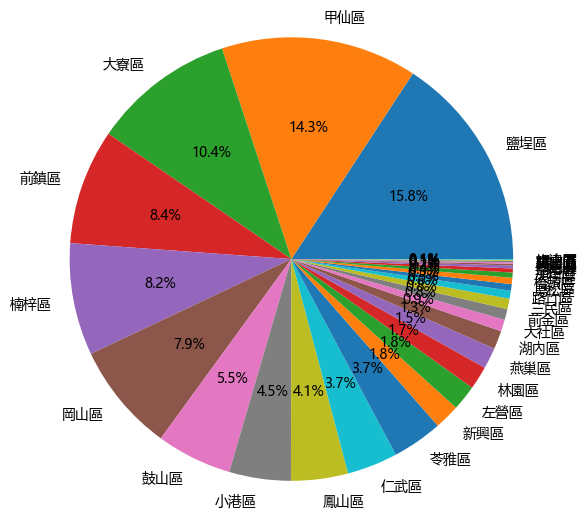

In [23]:
plt.pie(train_data['District'].value_counts(), radius=1.5, labels=train_data['District'].unique(),autopct='%.1f%%')
plt.show()

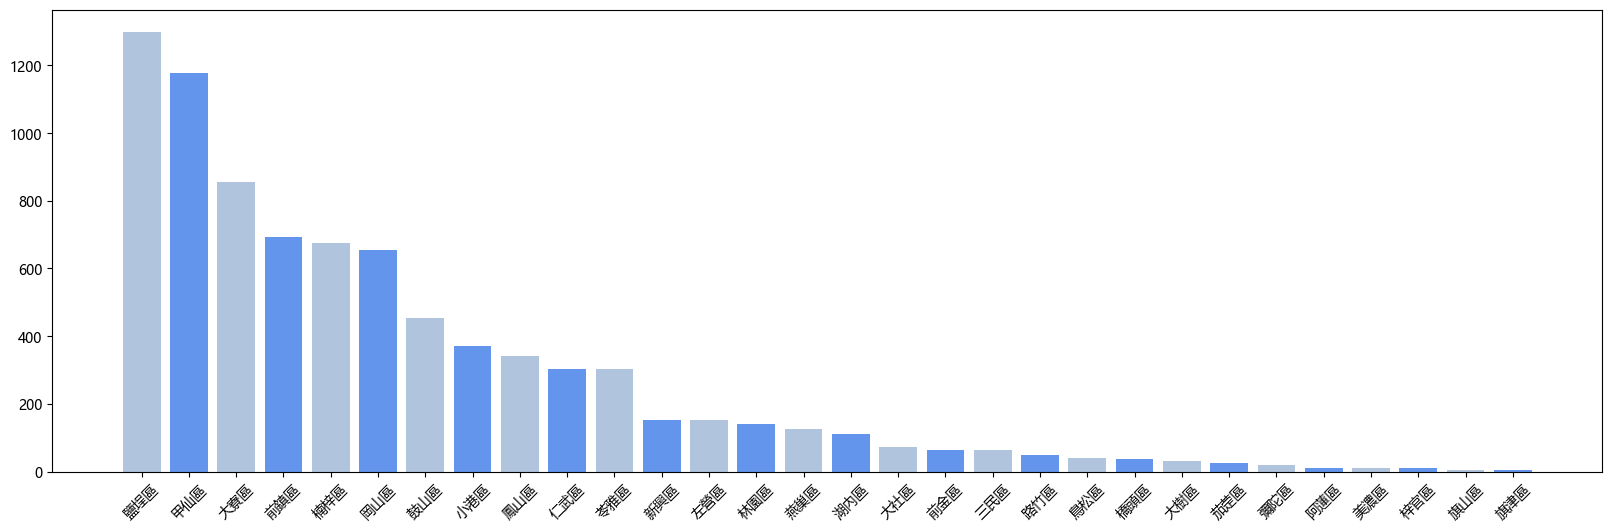

In [24]:
live=train_data.District.unique()
x = np.arange(len(live))
# 使用 Matplotlib 的 'rcParams' 配置參數來設置字體支持中文顯示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 'Microsoft YaHei' 是一種常用的中文字體
plt.rcParams['axes.unicode_minus'] = False  # 正確顯示負號
plt.figure(figsize=(20, 6))  # 調整圖表大小
plt.bar(train_data.District.unique(),
        train_data.District.value_counts(), 
        align='center', 
        color=['lightsteelblue', 
               'cornflowerblue'])
plt.xticks(x ,live,rotation=45) #rotation旋轉標籤
plt.show()


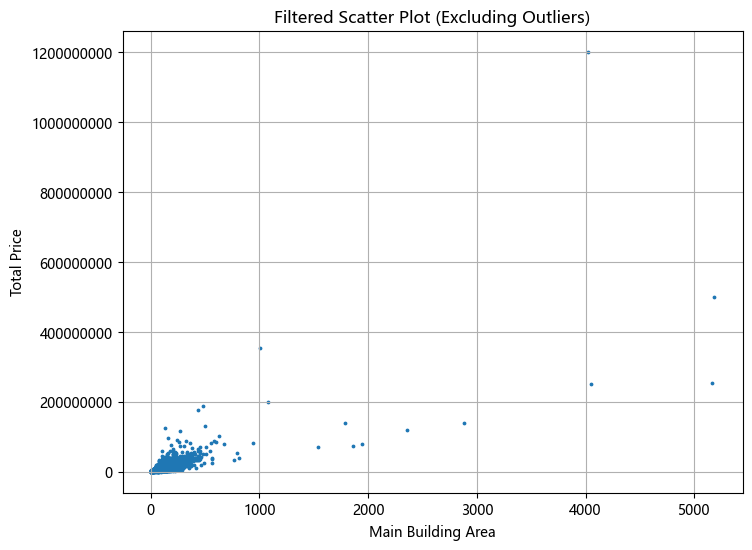

In [28]:
filtered_df = train_data['PriceNTD']
plt.figure(figsize=(8, 6))
plt.scatter(train_data['main building area'], train_data['PriceNTD'], s=3)
plt.xlabel('Main Building Area')
plt.ylabel('Total Price')
plt.title('Filtered Scatter Plot (Excluding Outliers)')
plt.grid(True)
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

Text(0.5, 1.0, ' Grlivarea and SalePrice')

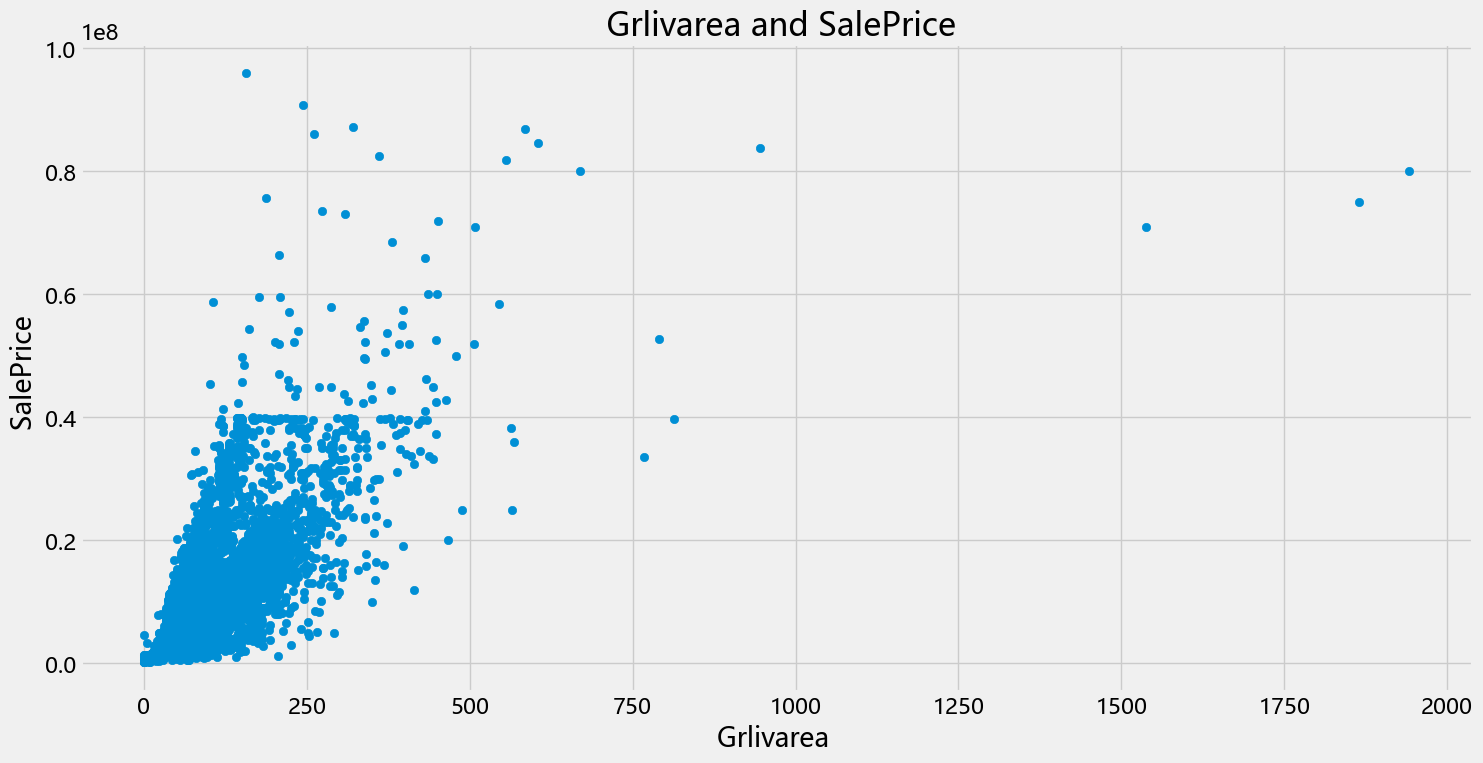

In [ ]:
filtered_df = train_data[train_data['PriceNTD'] < 1e8]
plt.figure(figsize=(16, 8))
plt.scatter(x=filtered_df['main building area'], y=filtered_df['PriceNTD'])
plt.ylim=(0,800000)  # y坐标轴范围
plt.xlabel('Grlivarea ')  # x轴名称
plt.ylabel('SalePrice ')  # y轴名称
plt.title(' Grlivarea and SalePrice') #标题

Text(0.5, 1.0, 'OverallQual and SalePrice')

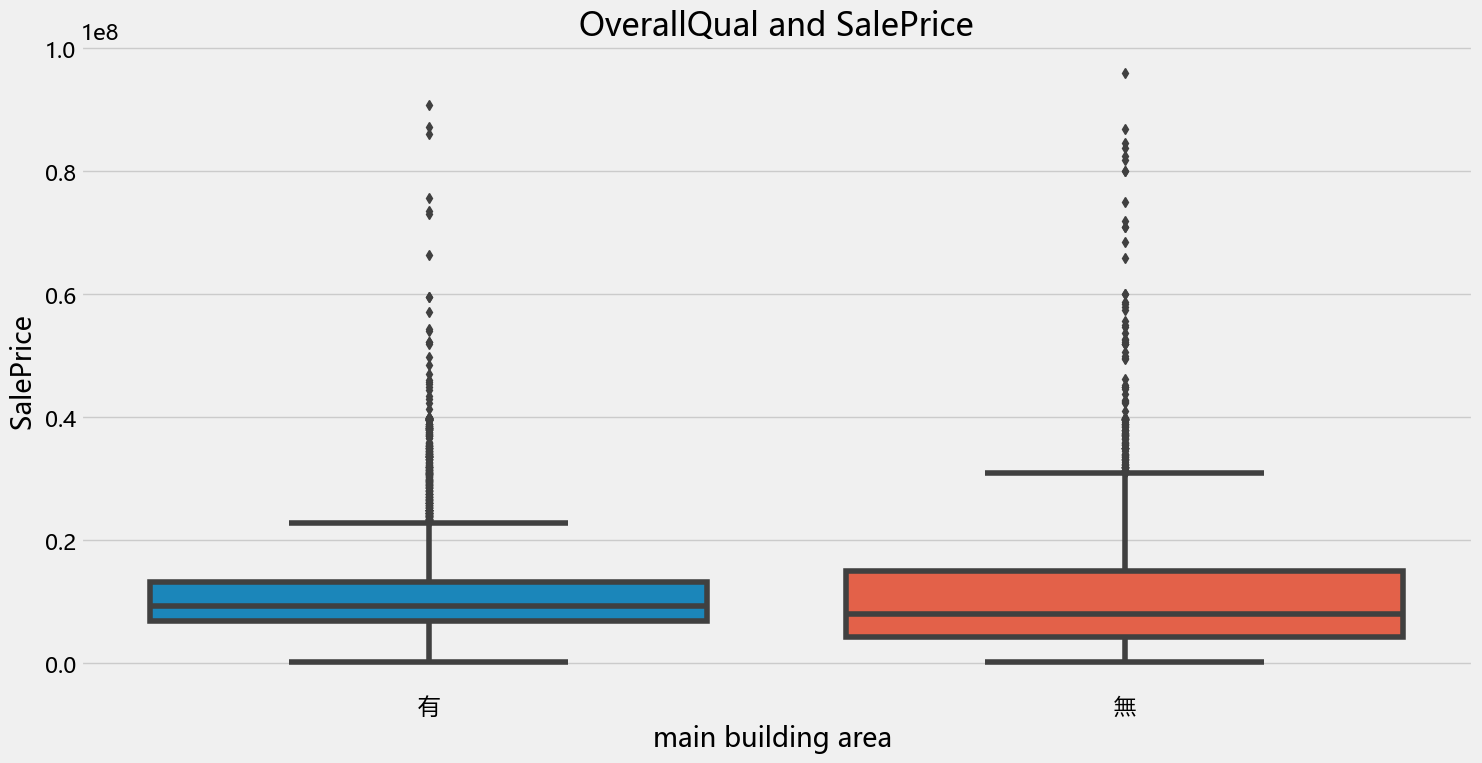

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=filtered_df['ManagementOrganization'], y=filtered_df['PriceNTD'])
plt.ylim=(0,800000)  # y坐标轴范围
plt.xlabel('main building area ')  # x轴名称
plt.ylabel('SalePrice ')  # y轴名称
plt.title('OverallQual and SalePrice') #标题

# 正規化

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8241 entries, 0 to 10742
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   District                   8241 non-null   object 
 1   LandShiftingTotalArea      8241 non-null   float64
 2   theUseZoningorCompiles     8241 non-null   object 
 3   TransactionYearMonthDay    8241 non-null   int64  
 4   TransactionPenNumber       8241 non-null   object 
 5   ShiftingfloorNumber        8241 non-null   object 
 6   floor                      8241 non-null   object 
 7   BuildingState              8241 non-null   object 
 8   ConstructionYear           8241 non-null   float64
 9   BuildingShiftingTotalArea  8241 non-null   float64
 10  Room                       8241 non-null   int64  
 11  Hall                       8241 non-null   int64  
 12  Bathroom                   8241 non-null   int64  
 13  Compartment                8241 non-null   obje

In [ ]:
labelencoder = LabelEncoder()
train_data['District'] = labelencoder.fit_transform(train_data['District'].values)
train_data['theUseZoningorCompiles'] = labelencoder.fit_transform(train_data['theUseZoningorCompiles'].values)
train_data['BuildingState'] = labelencoder.fit_transform(train_data['BuildingState'].values)
train_data['Compartment'] = labelencoder.fit_transform(train_data['Compartment'].values)
train_data['ManagementOrganization'] = labelencoder.fit_transform(train_data['ManagementOrganization'].values)
train_data['elevator'] = labelencoder.fit_transform(train_data['elevator'].values)
train_data['BerthCategory'] = labelencoder.fit_transform(train_data['BerthCategory'].values)

In [ ]:
# 正則表達式用來匹配 "土地X建物Y車位Z" 格式，其中 X, Y, Z 為數字
train_data[['Land', 'Building', 'Berth']] = train_data['TransactionPenNumber'].str.extract('土地(\d+)建物(\d+)車位(\d+)')
# 轉換數據類型，因為提取出來的數據預設是字符串
train_data[['Land', 'Building', 'Berth']] = train_data[['Land', 'Building', 'Berth']].astype(int)
train_data = train_data.drop(['TransactionPenNumber'], axis=1)

In [ ]:
train_data['ConstructionYear']=train_data['ConstructionYear'].astype(int)

In [ ]:
train_data['Year'] = train_data['ConstructionYear'].apply(lambda x: str(x)[:3] if len(str(x)) == 7 else str(x)[:2])

In [ ]:
train_data['Year']=113-train_data['Year'].astype(int)

In [ ]:
def chinese_to_arabic(cn):
    digits = {'一': 1, '二': 2, '三': 3, '四': 4, '五': 5, '六': 6, '七': 7, '八': 8, '九': 9, '十': 10}
    if cn == '全':
        return None  
    elif cn.startswith('十'):
        return 10 + digits.get(cn[1:], 0)
    elif cn.endswith('十'):
        return digits.get(cn[:-1], 1) * 10
    else:
        return digits.get(cn, None)

train_data['ShiftingfloorNumber'] = train_data['ShiftingfloorNumber'].apply(lambda x: chinese_to_arabic(x.replace('層', '')))
train_data['floor'] = train_data['floor'].apply(lambda x: chinese_to_arabic(x.replace('層', '')))

train_data['ShiftingfloorNumber'].fillna(0, inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8241 entries, 0 to 10742
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   District                   8241 non-null   int32  
 1   LandShiftingTotalArea      8241 non-null   float64
 2   theUseZoningorCompiles     8241 non-null   int32  
 3   TransactionYearMonthDay    8241 non-null   int64  
 4   ShiftingfloorNumber        8241 non-null   float64
 5   floor                      7068 non-null   float64
 6   BuildingState              8241 non-null   int32  
 7   ConstructionYear           8241 non-null   int32  
 8   BuildingShiftingTotalArea  8241 non-null   float64
 9   Room                       8241 non-null   int64  
 10  Hall                       8241 non-null   int64  
 11  Bathroom                   8241 non-null   int64  
 12  Compartment                8241 non-null   int32  
 13  ManagementOrganization     8241 non-null   int3

# 正態化

In [ ]:
# sns.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)



 mu = 11158592.88 and sigma = 8467276.24



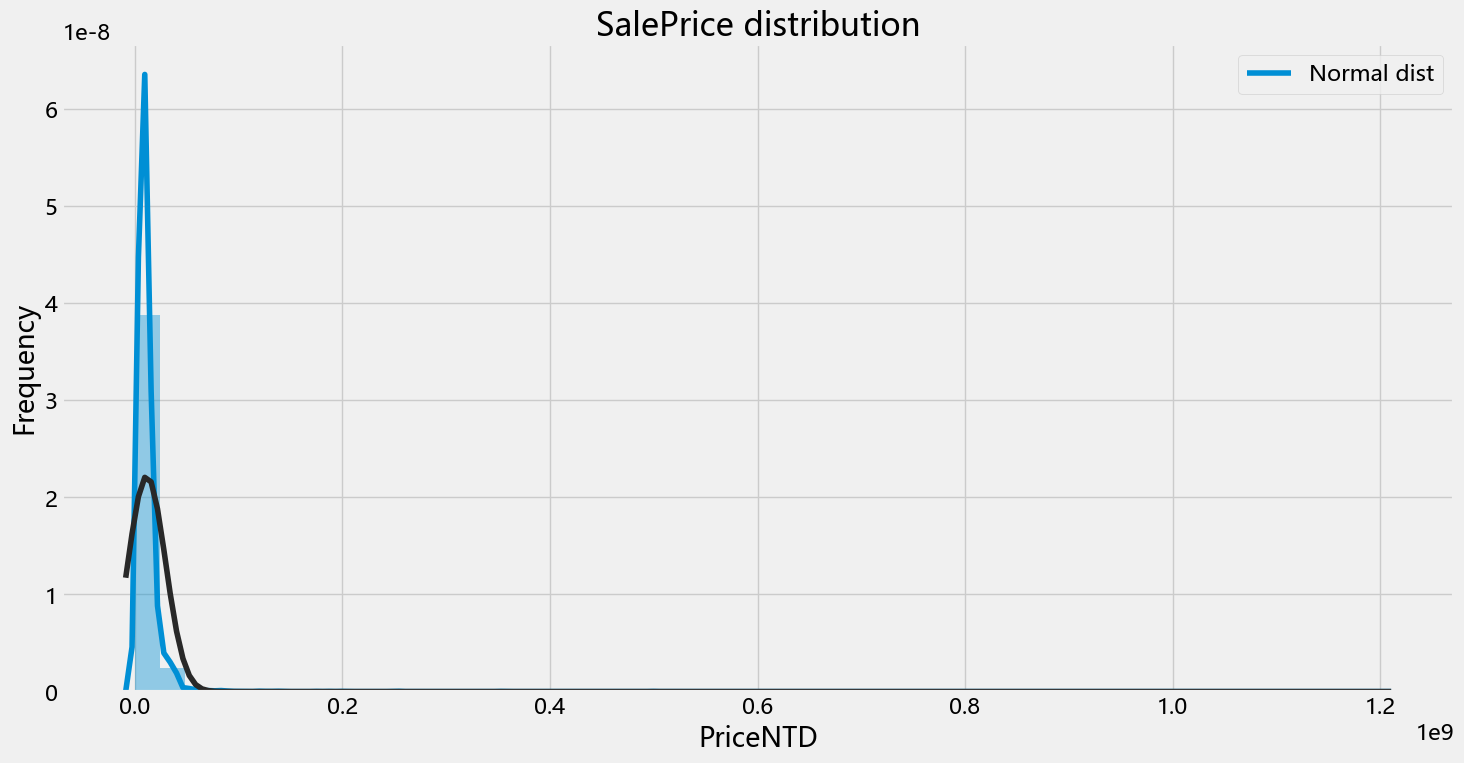

In [ ]:

# 绘制目标特征的概率分布图
plt.figure(figsize=(16, 8))
sns.distplot(train_data['PriceNTD'], fit=norm) # 拟合标准正态分布
plt.legend(['Normal dist'], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# 获取目标特征的正态分布参数
(mu, sigma) = norm.fit(filtered_df['PriceNTD']) # fit方法：对一组随机取样进行拟合，最大似然估计方法找出最适合取样数据的概率密度函数系数。
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

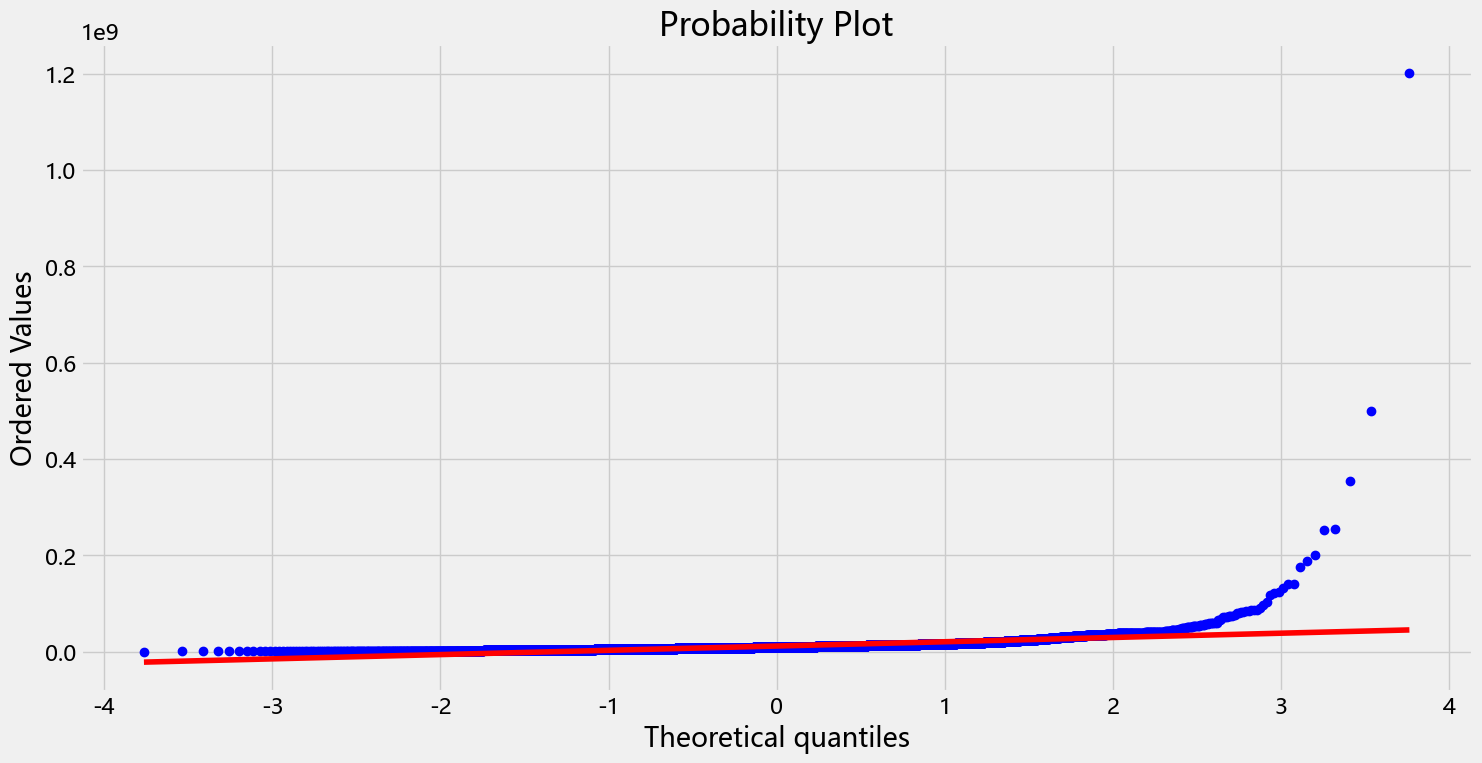

In [ ]:
plt.figure(figsize=(16, 8))
res = stats.probplot(train_data['PriceNTD'], plot=plt)

圖中可見目標變數呈現偏態分佈，需要轉換為常態分佈以便運用線性迴歸模型。

建構模型時為什麼要盡量將偏態資料轉換為常態分佈資料？

很多演算法，例如線性迴歸，它的推導是基於一個基本的假設-資料服從高斯分佈(正態分佈),如果資料不服從高斯分佈,那麼線性迴歸的推導根本就是空談。不幸的是，現實中很少有數據完美的服從高斯分佈，我們所獲得的數據並不是呈現標準的常態分佈,

這就需要我們來做轉換。

對數轉換
明顯右偏，取對數。這裡運用了log1p函數，傳回的是 log(1+x)。

In [ ]:
# # 正态化Y
# train_data['PriceNTD']= np.log1p(train_data['PriceNTD'])

# # 绘制分布图检查新的分布
# sns.distplot(train_data['PriceNTD'], fit=norm);
# plt.legend(['Normal dist'], loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')

# # 获取新的正态分布参数
# (mu, sigma) = norm.fit(train_data['PriceNTD'])
# print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# # 绘制QQ-plot图
# fig = plt.figure()
# res = stats.probplot(train_data['PriceNTD'], plot=plt)

In [ ]:
# 筛选出所有数值型的特征
numeric_feats = train_data.dtypes[train_data.dtypes != "object"].index

# 检查所有数值型特征的偏态
skewed_feats = train_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Building,43.934262
PriceNTD,39.868132
LandShiftingTotalArea,26.519198
main building area,23.443482
Bathroom,22.523744
Berth,21.801310
BuildingShiftingTotalArea,20.131067
Room,19.371929
auxiliary building area,14.064909
Land,5.898790


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train_data[feat] = boxcox1p(train_data[feat], lam)

There are 26 skewed numerical features to Box Cox transform


In [ ]:
# 筛选出所有数值型的特征
numeric_feats = df.dtypes[df.dtypes != "object"].index

# 检查所有数值型特征的偏态
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
LandShiftingTotalArea,35.336962
PriceNTD,24.946789
main building area,22.310819
Bathroom,18.883793
BuildingShiftingTotalArea,18.290729
auxiliary building area,15.165020
Room,12.921228
balcony area,4.684102
BerthTotalPriceNTD,2.532546
BerthShiftingTotalArea,2.153406


# 資料分數據集

In [ ]:
train_data.columns

Index(['District', 'LandShiftingTotalArea', 'theUseZoningorCompiles',
       'TransactionYearMonthDay', 'ShiftingfloorNumber', 'floor',
       'BuildingState', 'ConstructionYear', 'BuildingShiftingTotalArea',
       'Room', 'Hall', 'Bathroom', 'Compartment', 'ManagementOrganization',
       'PriceNTD', 'BerthCategory', 'BerthShiftingTotalArea',
       'BerthTotalPriceNTD', 'main building area', 'auxiliary building area',
       'balcony area', 'elevator', 'Land', 'Building', 'Berth', 'Year'],
      dtype='object')

In [ ]:
X = train_data[['District', 'LandShiftingTotalArea', 'theUseZoningorCompiles',
       'TransactionYearMonthDay', 'ShiftingfloorNumber', 'floor',
       'BuildingState', 'ConstructionYear', 'BuildingShiftingTotalArea',
       'Room', 'Hall', 'Bathroom', 'Compartment', 'ManagementOrganization',
       'BerthCategory', 'BerthShiftingTotalArea',
       'BerthTotalPriceNTD', 'main building area', 'auxiliary building area',
       'balcony area', 'elevator', 'Land', 'Building', 'Berth', 'Year']]
y = train_data['PriceNTD']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8241 entries, 0 to 10742
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   District                   8241 non-null   float64
 1   LandShiftingTotalArea      8241 non-null   float64
 2   theUseZoningorCompiles     8241 non-null   float64
 3   TransactionYearMonthDay    8241 non-null   float64
 4   ShiftingfloorNumber        8241 non-null   float64
 5   floor                      7068 non-null   float64
 6   BuildingState              8241 non-null   float64
 7   ConstructionYear           8241 non-null   float64
 8   BuildingShiftingTotalArea  8241 non-null   float64
 9   Room                       8241 non-null   float64
 10  Hall                       8241 non-null   float64
 11  Bathroom                   8241 non-null   float64
 12  Compartment                8241 non-null   float64
 13  ManagementOrganization     8241 non-null   floa

# 資料的圖像表示

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<AxesSubplot:>

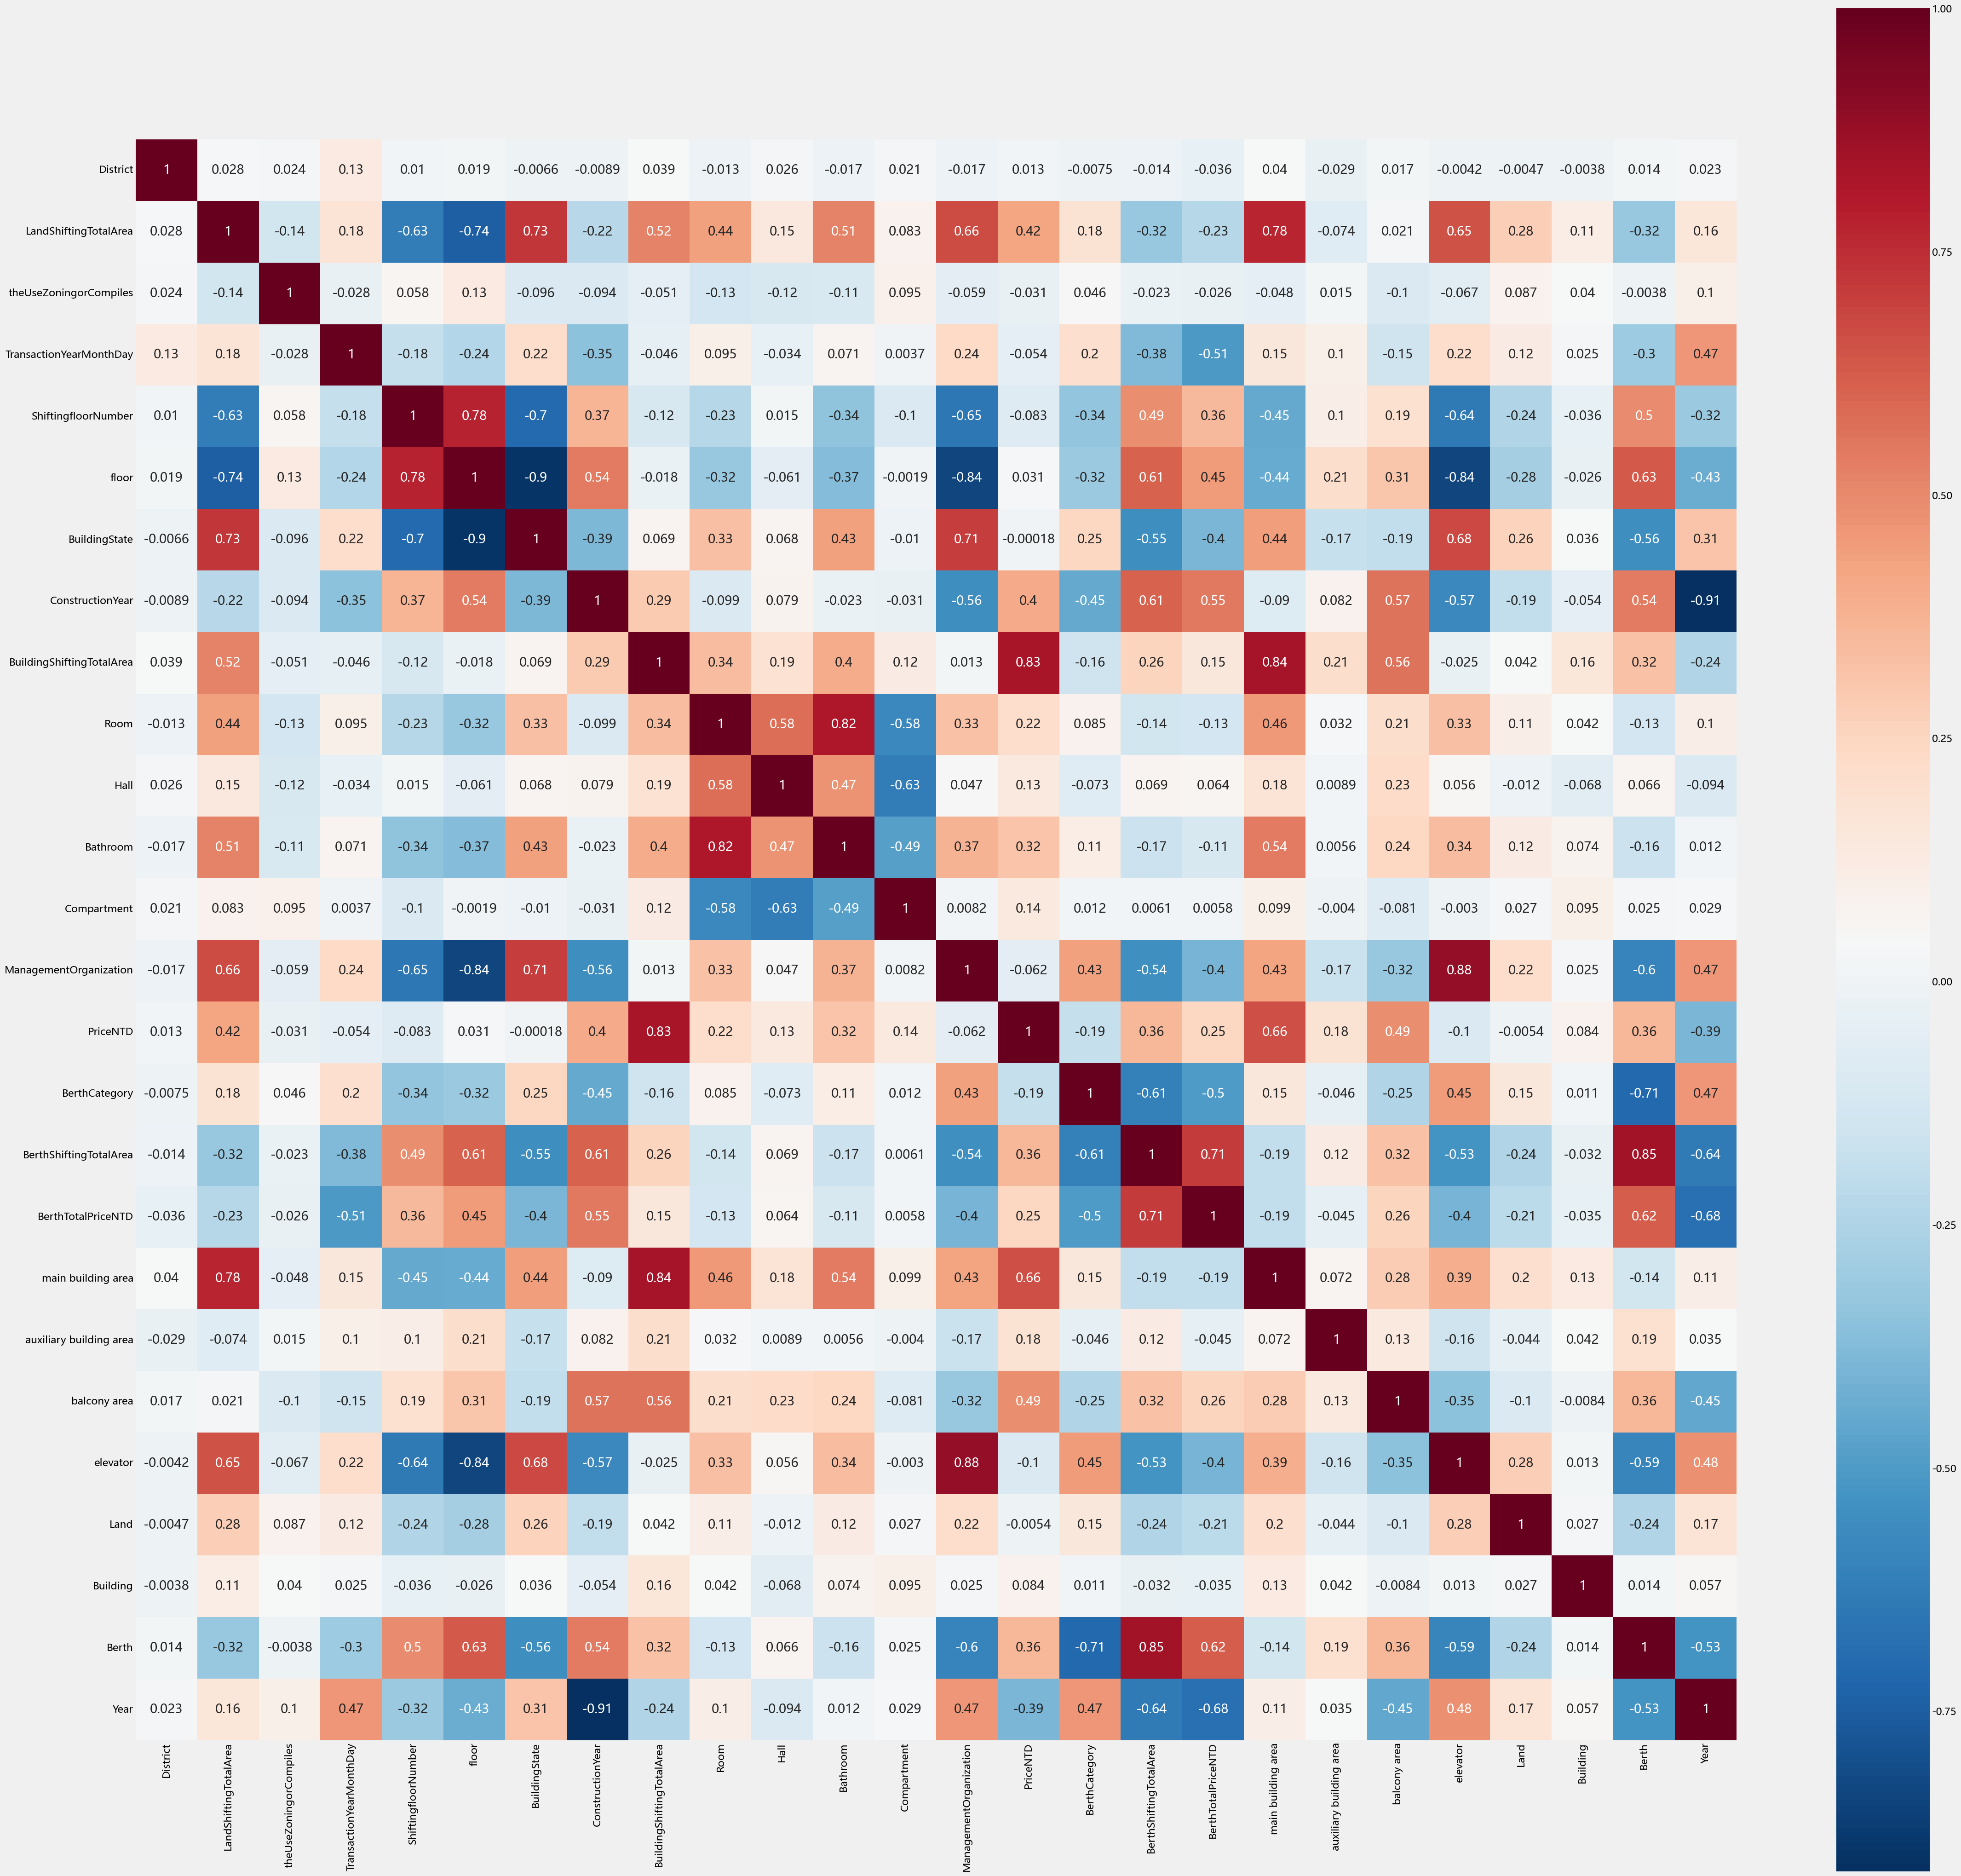

In [ ]:
# 關聯矩陣圖
corr = train_data[['District', 'LandShiftingTotalArea', 'theUseZoningorCompiles',
       'TransactionYearMonthDay', 'ShiftingfloorNumber', 'floor',
       'BuildingState', 'ConstructionYear', 'BuildingShiftingTotalArea',
       'Room', 'Hall', 'Bathroom', 'Compartment', 'ManagementOrganization',
       'PriceNTD', 'BerthCategory', 'BerthShiftingTotalArea',
       'BerthTotalPriceNTD', 'main building area', 'auxiliary building area',
       'balcony area', 'elevator', 'Land', 'Building', 'Berth', 'Year']].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr, square=True, annot=True, cmap='RdBu_r',annot_kws={"size": 20})

In [ ]:
X_train.shape

(5768, 25)

In [ ]:
y_train.shape

(5768,)

# 開始

## XGBoost

In [ ]:
xgb_grid=xgb.XGBRegressor(eval_metric='rmsle',tree_method= 'gpu_hist')
param_grid = {
    'n_estimators': [5, 100],  # 樹的數量
    "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'max_depth': [3, 6, 9, 12],  # 最大深度
    'min_child_weight': [1, 5, 11, 20],  # 最小子權重
    'subsample': [0.6, 0.8, 1.0],  # 每棵樹隨機抽樣的比例
    'colsample_bytree': [0.5, 0.7, 1.0],  # 每棵樹使用的特徵比例
    'learning_rate': [0.01, 0.05, 0.1],  # 學習率
    # 'missing': [-999],  # 缺失值處理
    # 'seed': [1337],  # 隨機種子
    # 'silent': [1],  # 是否打印運行消息
}

search = GridSearchCV(xgb_grid, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

KeyboardInterrupt: 

In [ ]:
xgb_grid=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle',tree_method= 'gpu_hist')
xgb_grid.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

RMSLE 分數的最小值為零。 越小越好

In [ ]:
predictions = xgb_grid.predict(X_test)
RMSLE = np.sqrt( mean_squared_log_error(y_test, predictions) )
print("The score is %.5f" % RMSLE )

The score is 0.00220


In [ ]:
xgb_grid.score(X_test,y_test)

0.8463288256409525

### 特徵重要性

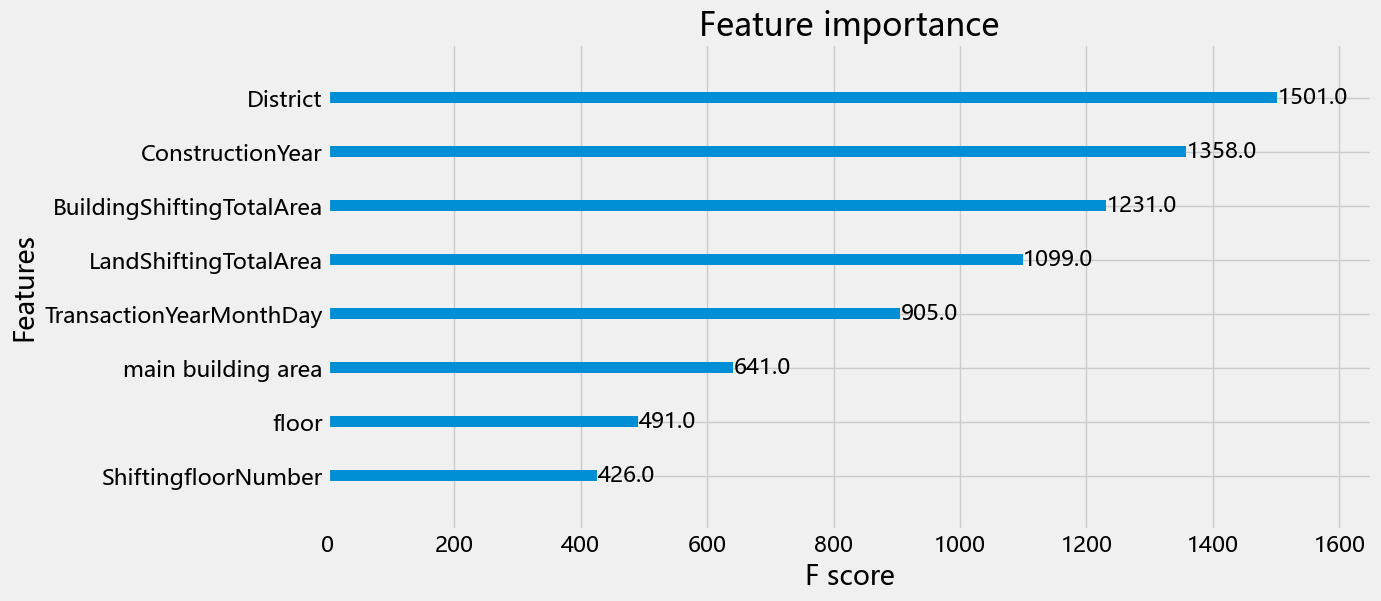

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(xgb_grid, max_num_features=8, ax=ax)
plt.show()

## RMSLE 評估指標

從競賽評估頁面可以看到，我們使用的評估指標是 **根均方對數誤差 (RMSLE)**，其公式如下：

\[ 
\text{RMSLE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}\left( \log(1 + \hat{y}_{i}) - \log(1 + y_{i}) \right)^2} 
\]

- **符號說明：**
  - `\hat{y}_{i}` 是第 \(i\) 個實例的預測值。
  - `y_{i}` 是第 \(i\) 個實例的實際值。
  - `n` 是數據實例的數量。
  - 該公式使用預測值和實際值的自然對數（每個都加 1，以避免對零取對數造成的未定義問題）。

### 非對稱懲罰

RMSLE 與 RMSE 不同，它具有非對稱性：對低估的懲罰比對高估的懲罰更嚴重。例如：

- 如果真實值 (`yi`) 是 1000，而預測低估了 600（例如，預測 400），與高估 600（預測 1600）相比，低估的懲罰幾乎是後者的兩倍。

### 實際意義

這意味著 RMSLE 可能不適用於需要對高估和低估給予相同懲罰的情況。它特別適用於低估比高估更值得關注的問題。


In [ ]:
def RSLE(y_hat,y):
    return np.sqrt((np.log1p(y_hat) - np.log1p(y))**2)

print("The RMSLE score is %.3f" % RSLE( 400,1000) )# 低估的情況（預測 400，實際 1000）
print("The RMSLE score is %.3f" % RSLE(1600,1000) )# 高估的情況（預測 1600，實際 1000）

The RMSLE score is 0.915
The RMSLE score is 0.470


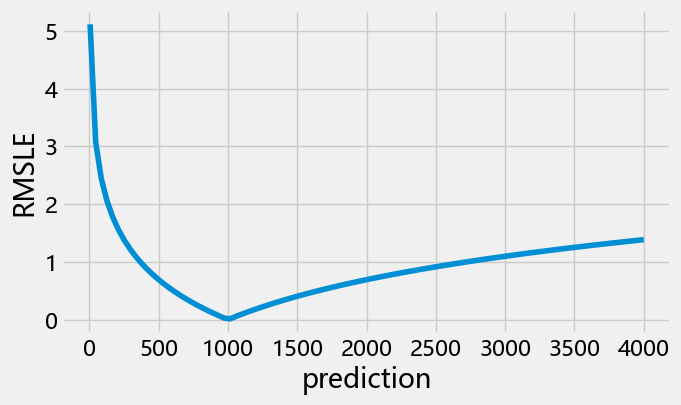

In [ ]:

plt.rcParams["figure.figsize"] = (7, 4)
x = np.linspace(5,4000,100)
plt.plot(x, RSLE(x,1000))
plt.xlabel('prediction')
plt.ylabel('RMSLE')
plt.show()


## 一般方法

In [ ]:
# xgb_model = XGBRegressor(max_depth=8,
#                        n_estimators=3000,  #2500
#                        learning_rate=0.008,
#                        subsample=0.84,
#                        booster= 'gbtree',
#                        tree_method= 'gpu_hist',
#                        colsample_bytree= 0.70,
#                        reg_lambda= 5,
#                        reg_alpha= 32,
#                        n_jobs= 4,  
#                        alpha=0.5,
#                        random_state=42,
#                        eval_metric='rmsle')        
xgb_model = XGBRegressor()  
xgb_model.fit(X_train,y_train)
pred_xgb = xgb_model.predict(X_test)

In [ ]:
pred_xgb = xgb_model.predict(X_test)
RMSLE = np.sqrt( mean_squared_log_error(y_test, pred_xgb) )
print("The score is %.5f" % RMSLE )

The score is 0.00222


In [ ]:
xgb_model.score(X_test,y_test)

0.8435389453888529

In [ ]:
val_error = mean_squared_error(y_test, pred_xgb,squared=False)  
print("Validation DATA RMSE:", val_error)   


Validation DATA RMSE: 0.03189367962029995


In [ ]:
#在訓練和測試集上列印分數
print('訓練集分數：{:.4f}'.format(xgb_model.score(X_train,y_train)))
print('測試集分數：{:.4f}'.format(xgb_model.score(X_test,y_test)))

訓練集分數：0.9978
測試集分數：0.7526


訓練和測試集的準確性相當相似。 所以我們不能說存在過度擬合

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival = [[2	,695,	6290.92	,125,0	,6290.92,	1]]
my_survival2 = [[10.17,	14.88,	64.55,	311.9,	0.1134]]

pred = xgb_model.predict(my_survival)
print(pred)

print(pred)

[3.6296012]
[3.6296012]


# Bayes_opt

In [ ]:
# 定義優化的目標函數 LGBM_bayes，用於交叉驗證 LGBM 分類器的性能
def LGBM_bayes(learning_rate, n_estimators, num_leaves, max_depth, subsample, subsample_freq, colsample_bytree, reg_lambda, reg_alpha):
    # 設定分類器的超參數
    params2 = {
    'objective': 'binary',
    'learning_rate': learning_rate,  # 提升學習率
    'n_estimators': int(n_estimators),  # 擬合的提升樹數量
    'num_leaves': int(num_leaves),  # 基礎學習者的最大樹葉數
    'max_depth': int(max_depth),  # 基礎學習者的最大樹深度，<=0 表示沒有限制
    'subsample': subsample,  # 訓練實例的子採樣比率
    'subsample_freq': int(subsample_freq),  # 子採樣的頻率，<=0 表示未啟用
    'colsample_bytree': colsample_bytree,  # 構建每棵樹時的特徵子採樣比率
    'reg_lambda': reg_lambda,  # L2 正則化
    'reg_alpha': reg_alpha,  # L1 正則化
    'verbose': -1
}

    # 創建 LGBM 分類器
    lgb_model = lgb.LGBMClassifier(**params2)
    
    # 執行交叉驗證並返回平均精度
    scores = cross_val_score(lgb_model, X_train, y_train, cv=10, scoring='accuracy')
    
    return scores.mean()

# 定義超參數的搜索範圍 pbounds
pbounds = {
    'learning_rate': (0.01,1.0), # 提升學習率
    'n_estimators': (30, 5000),    # 擬合的提升樹數量
    'num_leaves': (2, 512), # 基礎學習者的最大樹葉數
    'max_depth': (-1, 256),   # 基礎學習者的最大樹深度，<=0 表示沒有限制
    'subsample': (0.01, 1.0 ),    # 訓練實例的子採樣比率
    'subsample_freq': (1, 10), # 子採樣的頻率，<=0 表示未啟用
    'colsample_bytree': (0.01, 1.0), # 構建每棵樹時的特徵子採樣比率
    'reg_lambda': (1e-9, 100.0),  # L2 正則化  
    'reg_alpha': (1e-9, 100.0)  # L1 正則化
}

# 初始化 BayesianOptimization 優化器
optimizer = BayesianOptimization(f=LGBM_bayes, pbounds=pbounds, random_state=100)

# 啟動優化過程，執行 5 次初始點評估，然後執行 10 次優化迭代
optimizer.maximize(init_points=5, n_iter=15)


|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | num_le... | reg_alpha | reg_la... | subsample | subsam... |
-------------------------------------------------------------------------------------------------------------------------------------


NameError: name 'lgb' is not defined

In [ ]:
score_best = optimizer.max["target"]
score_best

0.9296794871794871

In [ ]:
params_best = optimizer.max["params"]
params_best

{'colsample_bytree': 0.6070108771987586,
 'learning_rate': 0.11413112648780312,
 'max_depth': 51.95968182790099,
 'n_estimators': 1758.0631447981398,
 'num_leaves': 191.80441722543478,
 'reg_alpha': 5.165100102994853,
 'reg_lambda': 98.2799373083452,
 'subsample': 0.8511558700600098,
 'subsample_freq': 9.440630441857433}

In [ ]:
from sklearn.model_selection import cross_validate


def bayes_opt_validation(params_best):
        
        params_best = {
                'objective': 'binary',
                'learning_rate': params_best["learning_rate"],  # 提升學習率
                'n_estimators': int(params_best["n_estimators"]),  # 擬合的提升樹數量
                'num_leaves': int(params_best["num_leaves"]),  # 基礎學習者的最大樹葉數
                'max_depth': int(params_best["max_depth"]),  # 基礎學習者的最大樹深度，<=0 表示沒有限制
                'subsample': params_best["subsample"],  # 訓練實例的子採樣比率
                'subsample_freq': int(params_best["subsample_freq"]),  # 子採樣的頻率，<=0 表示未啟用
                'colsample_bytree': params_best["colsample_bytree"],  # 構建每棵樹時的特徵子採樣比率
                'reg_lambda': params_best["reg_lambda"],  # L2 正則化
                'reg_alpha': params_best["reg_alpha"],  # L1 正則化
                'verbose': -1
                }
        # 創建 LGBM 分類器
        lgb_model = lgb.LGBMClassifier(**params_best)
        
        # 執行交叉驗證並返回平均精度
        scores = cross_val_score(lgb_model, X_train, y_train, cv=10, scoring='accuracy')
        
        
        return scores.mean()


In [ ]:
bayes_opt_validation(params_best)

0.9296794871794871

# HyperOpt

- `hp.choice(label, options)`: 
  - 傳回一個選項，選項可以是列表或元組。選項可以是巢狀的表達式，用於組成條件參數。
    - hp.choice(“參數名稱”,[“字串1”,“字串2”,… ]) 
    - hp.choice(“參數名稱”,[*range(下界，上界，步長)]) 
    - hp.choice(“參數名稱”,[整數1,整數2,整數3,…])
    - hp.choice(“參數名稱”,[“字串1”,整數1,…])
- `hp.pchoice(label, p_options)`: 
  - 以一定的機率返回 p_options 中的一個選項。這使得函數在搜尋過程中對每個選項的可能性不均勻。

- `hp.uniform(label, low, high)`: 
  - 參數在 low 和 high 之間均勻分佈。

- `hp.quniform(label, low, high, q)`: 
  - 參數的值是 round(uniform(low, high)/q)*q，適用於那些離散的值。

- `hp.loguniform(label, low, high)`: 
  - 繪製 exp(uniform(low, high))，變數的值範圍是 [exp(low), exp(high)]。

- `hp.randint(label, upper)`: 
  - 返回一個在 [0, upper) 之間的隨機整數。


In [ ]:
# 定义参数空间
from hyperopt import hp
import numpy as np
LGBMR_space_params = {
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
    #subsample代表為採樣數
    #因為'goss'並無區分是否含有採樣數 所以給予1(不採樣)
    'boosting_type': hp.choice('boosting_type', [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
                                                {'boosting_type': 'dart', 'subsample': hp.uniform('dart_subsample', 0.5, 1)},
                                                {'boosting_type': 'goss', 'subsample': 1.0}]),
    'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0)
    }
print(LGBMR_space_params)

{'class_weight': <hyperopt.pyll.base.Apply object at 0x000001FBF642CA00>, 'boosting_type': <hyperopt.pyll.base.Apply object at 0x000001FBF642C850>, 'num_leaves': <hyperopt.pyll.base.Apply object at 0x000001FBF75ED1C0>, 'learning_rate': <hyperopt.pyll.base.Apply object at 0x000001FBF75ED340>, 'subsample_for_bin': <hyperopt.pyll.base.Apply object at 0x000001FBF75EDAF0>, 'min_child_samples': <hyperopt.pyll.base.Apply object at 0x000001FBF75EDBE0>, 'reg_alpha': <hyperopt.pyll.base.Apply object at 0x000001FBF75ED970>, 'reg_lambda': <hyperopt.pyll.base.Apply object at 0x000001FBF645F940>, 'colsample_bytree': <hyperopt.pyll.base.Apply object at 0x000001FBF645F730>}


In [ ]:
algo = 'lightgbm'

N_FOLDS = 5
MAX_EVALS = 10
def objective(params, n_folds = 5):
    clf = lgb.LGBMClassifier(is_unbalanced = True, 
                            application = 'binary', 
                            objetive = 'binary',
                            metric ='auc',                          
                            **params,random_state=9700)
    scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv=n_folds,  scoring='roc_auc')
    best_score = max(scores)
    loss = 1 - best_score
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

space = {
    'num_leaves':  hp.choice('num_leaves', range(50,100)),
    'max_bin':  hp.choice('max_bin', range(20,100)),
    'min_data_in_leaf':  hp.choice('min_data_in_leaf', range(300,1000)),
    'num_iterations':  hp.choice('num_iterations', range(100,1000)),
    'min_sum_hessian_in_leaf':  hp.choice('min_sum_hessian_in_leaf', range(20,60)),
    'max_depth':  hp.choice('max_depth', range(3,8)),
    'feature_fraction':  hp.uniform('feature_fraction', 0.2, 0.5),
    'subsample':  hp.uniform('subsample', 0.5, 0.9),
    'bagging_fraction':  hp.uniform('bagging_fraction', 0.5, 0.9),    
    'learning_rate':  hp.uniform('learning_rate', 0.001, 0.1),
    'lambda_l1':  hp.uniform('lambda_l1', 0.0001, 1),
    'lambda_l2':  hp.uniform('lambda_l2', 0.0001, 1),
    'verbose': -1,
}   
    
tpe_algorithm = tpe.suggest

# Trials object to track progress
bayes_trials = Trials()

# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = MAX_EVALS, trials = bayes_trials)


# Fit 
clf = lgb.LGBMClassifier(is_unbalanced = True, 
                            application = 'binary', 
                            objetive = 'binary',
                            metric ='auc',
                            num_leaves = best['num_leaves'],
                            max_bin = best['max_bin'],
                            min_data_in_leaf = best['min_data_in_leaf'],
                            min_sum_hessian_in_leaf = best['min_sum_hessian_in_leaf'],
                            max_depth = best['max_depth'],
                            feature_fraction = best['feature_fraction'],
                            subsample = best['subsample'],
                            bagging_fraction = best['bagging_fraction'],
                            learning_rate = best['learning_rate'],
                            lambda_l1 = best['lambda_l1'],
                            lambda_l2 = best['lambda_l2'],
                            random_state=9700)

clf.fit(X_train, y_train)
print(clf)

# Predict 
y_pred = clf.predict_proba(X_test)[:,1]
auc = round(roc_auc_score(y_test, y_pred  ),4)
print(f'ROC_AUC: {auc}' )

100%|██████████| 10/10 [00:01<00:00,  7.52trial/s, best loss: 0.5]
[LightGBM] [Warning] Unknown parameter: objetive
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] min_data_in_leaf is set=293, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=293
[LightGBM] [Warning] feature_fraction is set=0.3747585077750848, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3747585077750848
[LightGBM] [Warning] lambda_l1 is set=0.5759613585564303, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5759613585564303
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] lambda_l2 is set=0.9937823394990264, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9937823394990264
[LightGBM] [Warning] bagging_fraction is set=0.7295348395312172, subsample=0.789954707723066 will be ignored. Current value: bagging_fraction=0.72953

In [ ]:
train_data = lgb.Dataset(data=X_train,label=y_train)
test_data = lgb.Dataset(data=X_test,label=y_test)

In [ ]:
from hyperopt import fmin, tpe, hp, partial

# 自定义hyperopt的参数空间
space = {"max_depth": hp.randint("max_depth", 15),
        "num_trees": hp.randint("num_trees", 300),
        'learning_rate': hp.uniform('learning_rate', 1e-3, 5e-1),
        "bagging_fraction": hp.randint("bagging_fraction", 5),
        "num_leaves": hp.randint("num_leaves", 6),
        }

def argsDict_tranform(argsDict, isPrint=False):
    argsDict["max_depth"] = argsDict["max_depth"] + 5
    argsDict['num_trees'] = argsDict['num_trees'] + 150
    argsDict["learning_rate"] = argsDict["learning_rate"] * 0.02 + 0.05
    argsDict["bagging_fraction"] = argsDict["bagging_fraction"] * 0.1 + 0.5
    argsDict["num_leaves"] = argsDict["num_leaves"] * 3 + 10
    if isPrint:
        print(argsDict)
    else:
        pass

    return argsDict

In [ ]:
from sklearn.metrics import mean_squared_error

def lightgbm_factory(argsDict):
    argsDict = argsDict_tranform(argsDict)

    params = {'nthread': -1,  # 进程数
            'max_depth': argsDict['max_depth'],  # 最大深度
            'num_trees': argsDict['num_trees'],  # 树的数量
            'eta': argsDict['learning_rate'],  # 学习率
            'bagging_fraction': argsDict['bagging_fraction'],  # bagging采样数
            'num_leaves': argsDict['num_leaves'],  # 终点节点最小样本占比的和
            'objective': 'regression',
            'feature_fraction': 0.7,  # 样本列采样
            'lambda_l1': 0,  # L1 正则化
            'lambda_l2': 0,  # L2 正则化
            'bagging_seed': 100,  # 随机种子,light中默认为100
            'verbose': -1
            }
    #rmse
    params['metric'] = ['rmse']

    model_lgb = lgb.train(params, train_data, num_boost_round=300, valid_sets=[test_data])

    return get_tranformer_score(model_lgb)

def get_tranformer_score(tranformer):

    model = tranformer
    prediction = model.predict(X_test, num_iteration=model.best_iteration)

    return mean_squared_error(y_test, prediction)

In [ ]:
# 开始使用hyperopt进行自动调参
algo = partial(tpe.suggest, n_startup_jobs=1)
best = fmin(lightgbm_factory, space, algo=algo, max_evals=20, pass_expr_memo_ctrl=None)

100%|██████████| 20/20 [00:01<00:00, 13.80trial/s, best loss: 0.051974714583210214]


In [ ]:
RMSE = lightgbm_factory(best)
print('best :', best)
print('best param after transform :')
argsDict_tranform(best,isPrint=True)
print('rmse of the best lightgbm:', np.sqrt(RMSE))
#RMSE的值越小越好

best : {'bagging_fraction': 0.6, 'learning_rate': 0.05374752808303588, 'max_depth': 14, 'num_leaves': 13, 'num_trees': 295}
best param after transform :
{'bagging_fraction': 0.56, 'learning_rate': 0.05107495056166072, 'max_depth': 19, 'num_leaves': 49, 'num_trees': 445}
rmse of the best lightgbm: 0.22797963633449855
